<a href="https://colab.research.google.com/github/seobando/TradingBot/blob/main/6_model_parameters_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/1 Formal Training/2 Msc. Ciencia de los datos/Semestre IV/Trader

/content/drive/MyDrive/1 Formal Training/2 Msc. Ciencia de los datos/Semestre IV/Trader


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get results
results = pd.read_csv("data/results.csv").drop("Unnamed: 0",axis=1)
# Get experiments
experiments = pd.read_csv("data/experiments.csv")
experiments = experiments.rename(columns={'Experiments': 'Experiment'})
# Get the same amount of experiments as results
experiments = experiments[experiments["Experiment"] <= results["Experiment"].max()]
# Add Time Frames
df = pd.merge(results,experiments,on="Experiment",how="left")
# Set third column color
df["color"] = np.where(df["Layers Type"] == "Constant","red","blue")

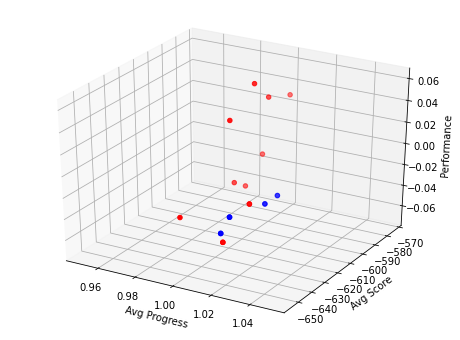

In [ ]:
## Plot 3D measure view
fig = plt.figure(figsize=(8, 6))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z = df["Performance"]
x = df["Avg Progress"]
y = df["Avg Score"]
color = df["color"] 
# plotting
ax.scatter(x, y, z, c = color)
ax.set_zlabel('Performance')
ax.set_xlabel('Avg Progress')
ax.set_ylabel('Avg Score')
plt.show()

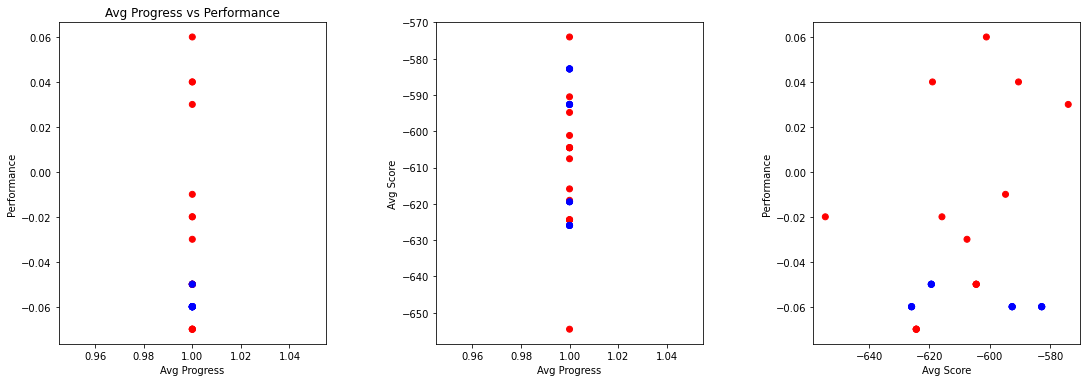

In [ ]:
## Plot 2D Analysis per couple of measures
ax1 = plt.subplot2grid((4,12), (0, 0), rowspan=3, colspan=3)
ax1.scatter(df["Avg Progress"], df["Performance"], c = color)
plt.title('Avg Progress vs Performance')
plt.xlabel('Avg Progress')
plt.ylabel('Performance')

ax2 = plt.subplot2grid((4,12), (0,4), rowspan=3, colspan=3)
ax2.scatter(df["Avg Progress"], df["Avg Score"], c = color)
plt.xlabel('Avg Progress')
plt.ylabel('Avg Score')

ax3 = plt.subplot2grid((4,12), (0,8), rowspan=3, colspan=3)
ax3.scatter(df["Avg Score"], df["Performance"], c = color)
plt.xlabel('Avg Score')
plt.ylabel('Performance')

plt.gcf().set_size_inches(20,8)

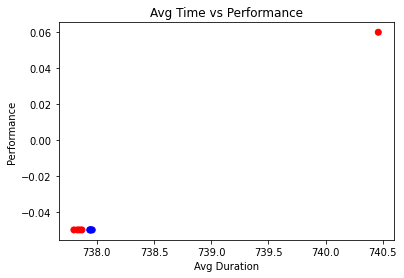

In [ ]:
## Get upper performances points
df = df[df["Performance"]!=0]

max_performance_fq_1 = df[df["Layers Type"] == "Constant"]["Performance"].max()
max_performance_fq_2 = df[df["Layers Type"] == "Decreasing"]["Performance"].max()
df = df[df["Performance"].isin([max_performance_fq_1,max_performance_fq_2])]

x = df["Avg Duration"]
y = df["Performance"]
color = df["color"]

plt.scatter(x, y, c = color)
plt.xlabel("Avg Duration")
plt.ylabel("Performance")
#plt.xticks(x, labels)
plt.title("Avg Time vs Performance")
plt.show()

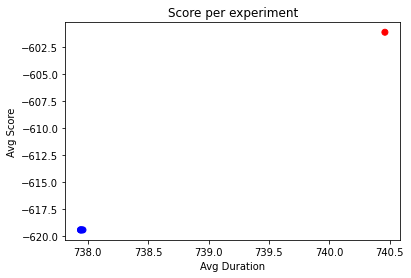

In [ ]:
## Get upper scoring measure
max_score_fq_1 = df[df["Layers Type"] == "Constant"]["Avg Score"].max()
max_score_fq_2 = df[df["Layers Type"] == "Decreasing"]["Avg Score"].max()
df = df[df["Avg Score"].isin([max_score_fq_1,max_score_fq_2])]

x = df["Avg Duration"]
y = df["Avg Score"]
color = df["color"]

plt.scatter(x, y, c = color)
plt.xlabel("Avg Duration")
plt.ylabel("Avg Score")
#plt.xticks(x, labels)
plt.title("Score per experiment")
plt.show()

In [ ]:
## Show first 5 best experiments
df = df.sort_values(by="Performance",ascending=False)[:5]
df.head()

,Experiment,Performance,Avg Progress,Avg Score,Avg Duration,KPIS,Initial Budget,Layer Amount Type,Layers Type,Nodes,Learning Period,Update Factor,Minibatch,color
25,26,0.06,1.0,-601.142400,740.46,All,10 per higher price,1,Constant,128,5,5,512,red
12,13,-0.05,1.0,-619.392606,737.95,All,10 per higher price,1,Decreasing,1024,20,5,2048,blue
14,15,-0.05,1.0,-619.392606,737.94,All,10 per higher price,1,Decreasing,1024,20,1,2048,blue
15,16,-0.05,1.0,-619.392606,737.96,All,10 per higher price,1,Decreasing,1024,5,5,2048,blue
31,32,-0.05,1.0,-619.392606,737.94,All,10 per higher price,1,Decreasing,1024,5,1,2048,blue


In [ ]:
## Select best experiment
selected_experiment = df["Experiment"].iloc[0]
experiments[experiments["Experiment"] == selected_experiment].to_csv("data/experiment.csv")